# 1. Importar librerias

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
import seaborn as sns

# 2. Cargar dataset

In [2]:
df = pd.read_csv('../../../data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Exploracion de los datos

In [5]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

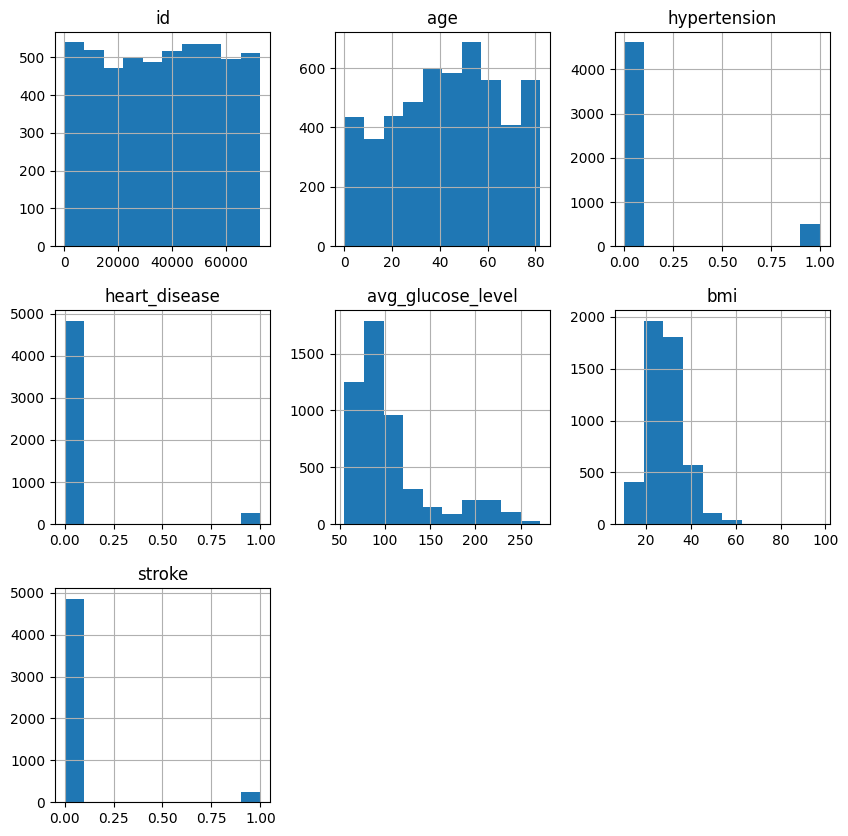

In [8]:
df.hist(figsize=(10,10))

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# 4. Preprocesamiento de datos

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
df = df.drop(['id'], axis= 1)

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df = df.dropna()

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [17]:
df['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [18]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
le = LabelEncoder()
df['stroke'] = le.fit_transform(df['stroke'])

/var/folders/9c/0nd6phzx429bzy7lvvwctvdm0000gn/T/ipykernel_65535/2654680058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'] = le.fit_transform(df['stroke'])


In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
df = df[df['gender'] != 'Other']

In [23]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [25]:
oe = OrdinalEncoder(dtype=int)
df[['gender', 'ever_married', 'Residence_type']] = oe.fit_transform(df[['gender', 'ever_married', 'Residence_type']])

/var/folders/9c/0nd6phzx429bzy7lvvwctvdm0000gn/T/ipykernel_65535/275633641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender', 'ever_married', 'Residence_type']] = oe.fit_transform(df[['gender', 'ever_married', 'Residence_type']])


In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [28]:
ohe = OneHotEncoder(dtype=int,sparse_output=False,drop="first")
codificado = ohe.fit_transform(df[['work_type','smoking_status']])

In [29]:
codificado

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
df2 = pd.DataFrame(codificado,columns=ohe.get_feature_names_out(),index=df.index)

In [31]:
df2

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0
2,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0
5,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
5104,0,0,0,1,0,0,0
5106,0,0,1,0,0,1,0
5107,0,0,1,0,0,1,0
5108,0,1,0,0,1,0,0


In [32]:
df = pd.concat((df,df2), axis=1)

In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0,0,0,0,1,0,0,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0,0,1,0,0,1,0,0


In [34]:
df = df.drop(['work_type', 'smoking_status'],axis=1)

In [35]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,1,0,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,1,0,0


<Axes: >

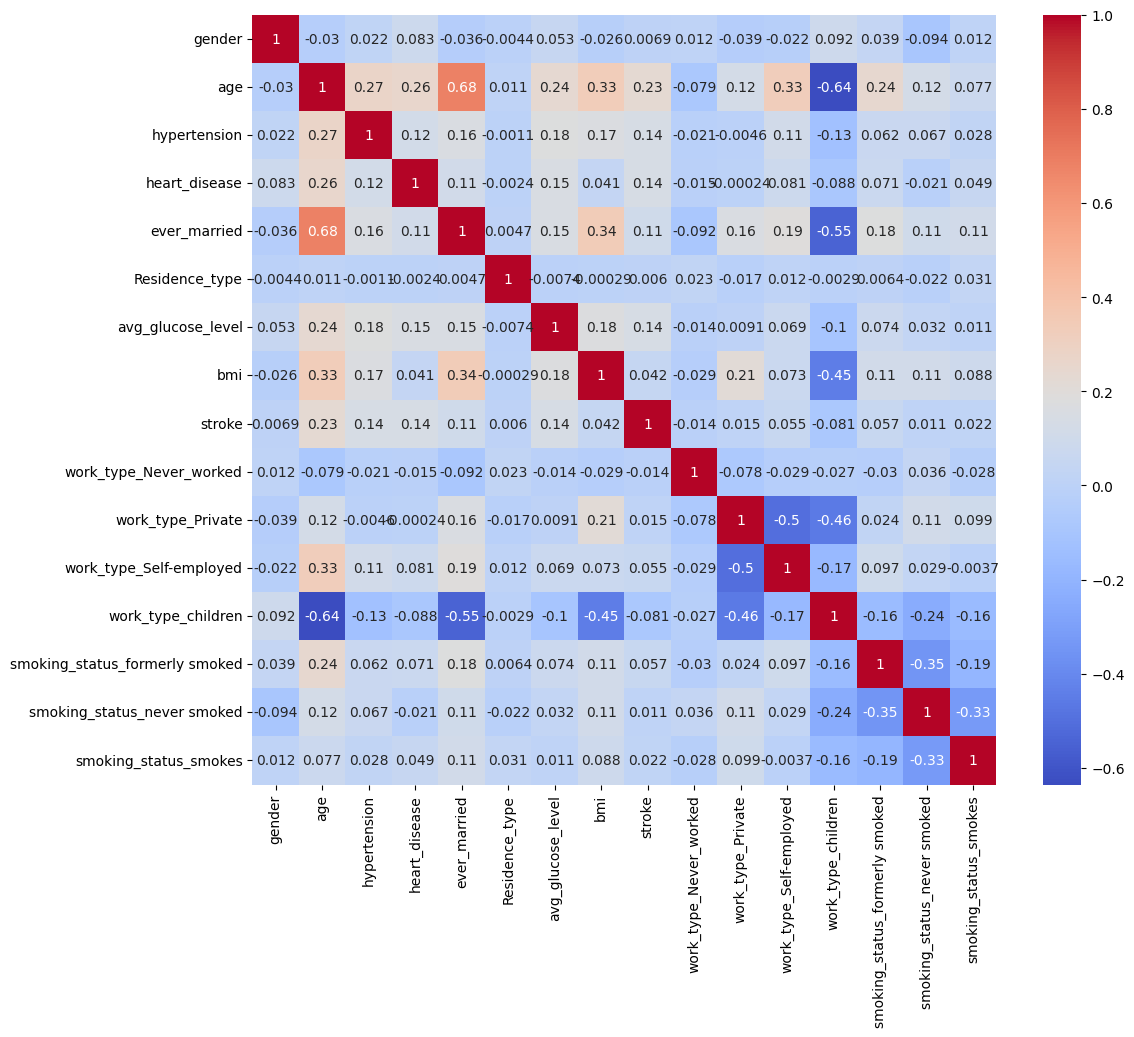

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

# 5.Seleccionar variables X y Y

In [37]:
x = df.drop(['stroke'], axis=1)
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,1,0,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,1,0,0,1,0,0


In [38]:
y = df['stroke']
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4908, dtype: int64

# 6. Dividir datos en entrenamiento y prueba

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,shuffle=True, random_state=42)

In [40]:
x_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3565,0,40.0,0,0,1,1,65.77,31.2,0,1,0,0,0,1,0
898,0,59.0,0,0,1,1,81.64,32.8,0,0,1,0,0,0,0
2706,0,54.0,0,0,1,1,99.83,22.7,0,1,0,0,1,0,0
4198,1,81.0,0,0,1,1,71.18,23.9,0,0,1,0,1,0,0
3527,0,11.0,0,0,0,1,69.68,14.4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,0,78.0,0,0,1,0,61.38,24.3,0,0,0,0,0,0,0
511,0,51.0,0,0,1,0,82.93,29.7,0,1,0,0,0,0,1
3248,0,35.0,1,0,1,1,94.20,34.4,0,1,0,0,0,0,1
3947,1,61.0,0,0,1,1,116.78,39.8,0,0,1,0,1,0,0


In [41]:
x_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4857,1,32.0,0,0,1,0,102.13,32.3,0,1,0,0,0,1,0
3709,0,42.0,0,0,0,1,84.03,31.4,0,1,0,0,0,1,0
964,1,66.0,1,0,1,0,74.90,32.1,0,1,0,0,0,1,0
2971,0,21.0,0,0,0,0,71.06,25.3,0,1,0,0,1,0,0
3262,1,47.0,0,0,1,0,88.49,22.2,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1,22.0,0,0,0,0,58.38,36.0,0,1,0,0,0,1,0
205,0,78.0,0,0,1,1,106.74,33.0,0,1,0,0,1,0,0
3838,1,56.0,0,0,1,1,122.73,37.5,0,0,1,0,1,0,0
4524,0,56.0,0,0,1,1,144.33,29.2,0,1,0,0,0,1,0


In [42]:
y_train

3565    0
898     0
2706    0
4198    0
3527    0
       ..
4614    0
511     0
3248    0
3947    0
916     0
Name: stroke, Length: 3926, dtype: int64

In [43]:
y_test

4857    0
3709    0
964     0
2971    0
3262    0
       ..
1022    0
205     1
3838    0
4524    0
2049    0
Name: stroke, Length: 982, dtype: int64

# 7. Escalamiento ->Opcional

# 8. Seleccionar el modelo y entrenarlo

In [44]:
model = DecisionTreeClassifier()

In [45]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

# 9.Hacer predicciones

In [47]:
prediccion = [
    1,#genero Hombre 1 mujer 0
    24,#age
    0,#hypertension No 0 Si 1
    0,#heart_disease No 0 Si 1
    0,#ever_married No 0 Si 1
    1,#residence_type Rural 0 Urban 1
    151.1,#avg_glucose_level
    30.6,#bmi
    0,#work_type_Never_worked
    1,#work_type_Private
    0,#work_type_Self-employed
    0,#work_type_children
    1,#smoking_status_formerly smoked
    0,#smoking_status_never smoked
    0#smoking_status_smokes
]

In [48]:
stroke_prediction = model.predict([prediccion])

/Users/memopispo/Documents/NumpyPandas/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [49]:
stroke_prediction

array([0])

In [50]:
y_prediction = model.predict(x_test)

In [51]:
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
y_test

4857    0
3709    0
964     0
2971    0
3262    0
       ..
1022    0
205     1
3838    0
4524    0
2049    0
Name: stroke, Length: 982, dtype: int64

# 10.Evaluar modelo

In [53]:
accuracy_score(y_test,y_prediction)

0.9114052953156823

In [54]:
import pickle

with open('modelo_clasificacion.pkl', 'wb') as file:
    pickle.dump(model,file)